In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os

churn_data=pd.read_csv("original.csv", index_col=[0,1])

#churn_data=churn_data[churn_data['adview_per_post'] != 0]

In [4]:
churn_data['adview_per_post']

account_id  observation_date
27          2020-03-01          2.357143
51          2020-03-01          4.750000
95          2020-03-01          0.265625
123         2020-03-01          0.307692
189         2020-03-01          2.000000
                                  ...   
13132       2020-05-10          0.100000
13141       2020-05-10          1.500000
13155       2020-05-10          1.000000
13171       2020-05-10          0.363636
13248       2020-05-10          2.405797
Name: adview_per_post, Length: 25806, dtype: float64

In [8]:
ncohort = 10
groups = pd.qcut(churn_data["adview_per_post"], ncohort, duplicates='drop')
groups

account_id  observation_date
27          2020-03-01            (2.25, 3.592]
51          2020-03-01           (3.592, 101.0]
95          2020-03-01            (0.203, 0.37]
123         2020-03-01            (0.203, 0.37]
189         2020-03-01            (1.625, 2.25]
                                     ...       
13132       2020-05-10          (-0.001, 0.203]
13141       2020-05-10           (1.238, 1.625]
13155       2020-05-10           (0.963, 1.238]
13171       2020-05-10            (0.203, 0.37]
13248       2020-05-10            (2.25, 3.592]
Name: adview_per_post, Length: 25806, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.203] < (0.203, 0.37] < (0.37, 0.529] < (0.529, 0.716] ... (1.238, 1.625] < (1.625, 2.25] < (2.25, 3.592] < (3.592, 101.0]]

de 85 a 3255 son los que tienen menos 

se empieza a agrandar 

son valores no repetidos


In [9]:
cohort_means = churn_data.groupby(groups, observed=False)["adview_per_post"].mean()

In [10]:
cohort_churns = churn_data.groupby(groups, observed=False)["is_churn"].mean()

In [13]:
plot_frame = pd.DataFrame(
    {
        'adview_per_post': cohort_means.values,
        'churn_rate' : cohort_churns.values
    })

plot_frame

,adview_per_post,churn_rate
0,0.088677,0.028273
1,0.290167,0.015498
2,0.451379,0.016590
3,0.623110,0.019081
4,0.830694,0.016660
5,1.083075,0.019342
6,1.422053,0.020535
7,1.914100,0.021864
8,2.817690,0.027462
9,6.737952,0.027132


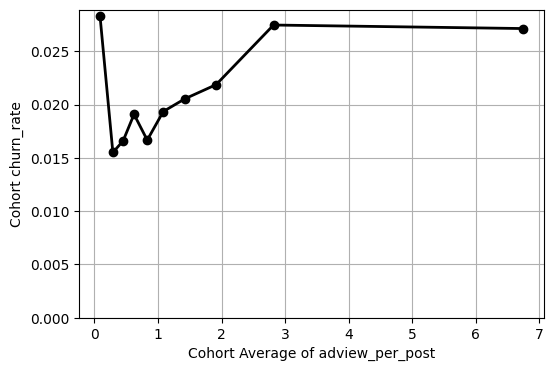

In [16]:
plt.figure(figsize=(6,4))
plt.plot('adview_per_post', 
         'churn_rate', 
         data=plot_frame, 
         label='adview_per_post', 
         marker='o', 
         linewidth=2, 
         color='black')

plt.xlabel("Cohort Average of adview_per_post")
plt.ylabel("Cohort churn_rate")
plt.grid()
plt.gca().set_ylim(bottom=0)
#plt.gca().set_xscale('log')
plt.savefig("original_cohort.png")

entonces hay un high churn rate cuando no lo usan
y tambien cuando ven adds y no postean
